# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')

In [ ]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

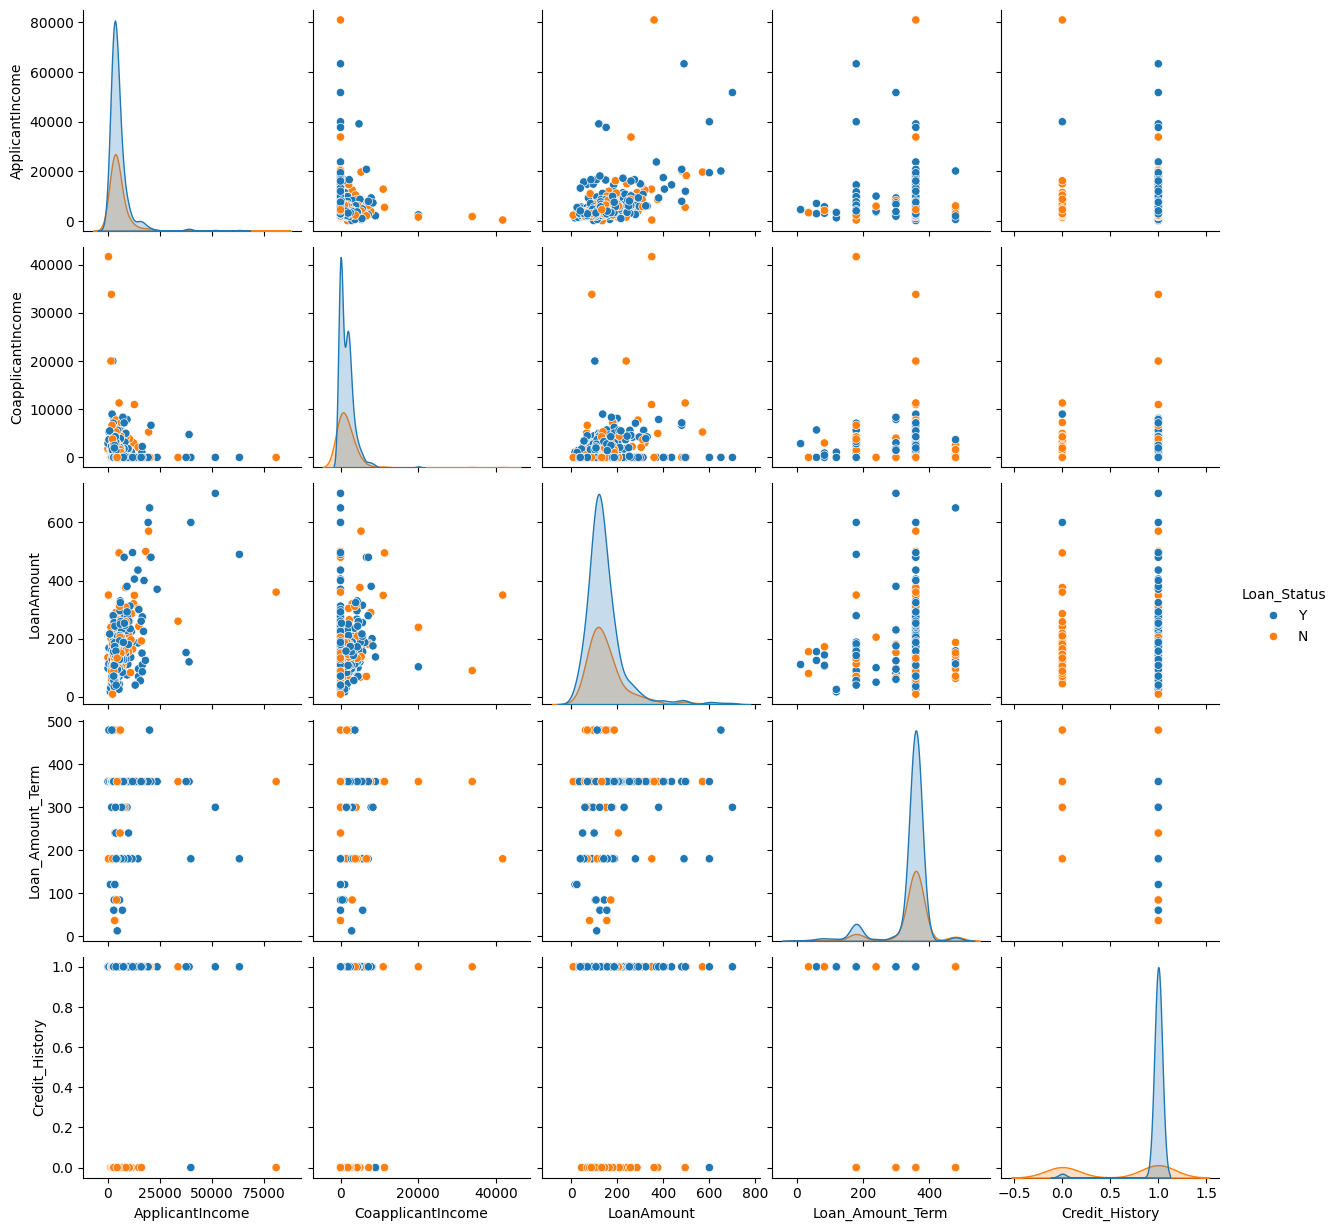

In [ ]:
sns.pairplot(train_data, hue='Loan_Status')
plt.show()

In [ ]:
print(train_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')


In [ ]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_valid_processed)

In [ ]:
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7886178861788617


# Fine-tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

In [ ]:
numerical_columns = [...]
categorical_columns = [...]

In [ ]:
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=3)

# Generate Predictions

In [ ]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')


In [ ]:
test_data.columns = test_data.columns.astype(str)

In [ ]:
preprocessor = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(handle_unknown="ignore"), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])])
preprocessor.fit(test_data)
X_test_processed = preprocessor.transform(test_data)

In [ ]:
import pandas as pd
columns_to_convert = ['age', 'bmi', 'bp', 'cholesterol', 'glucose', 'insulin', 'hba1c']

In [ ]:
X_train_processed = X_train_processed.reshape(-1,)
X_train_processed = pd.Series(X_train_processed)

In [ ]:
X_train_processed = X_train_processed.apply(pd.to_numeric, errors='coerce')
X_train_processed = X_train_processed.astype(float)


In [ ]:
X_test_processed = preprocessor.transform(test_data)

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
selector = SelectKBest(k=12)

# Replace 'Loan_Status' column and Save as CSV

In [ ]:
import numpy as np

In [ ]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
test_data.insert(0, 'age', np.random.randint(18, 65, size=len(test_data)))